### College Dataset Clustering


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('College.csv',index_col=0)

In [3]:
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 109.3+

In [5]:
df.isnull().sum()

Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<AxesSubplot:>

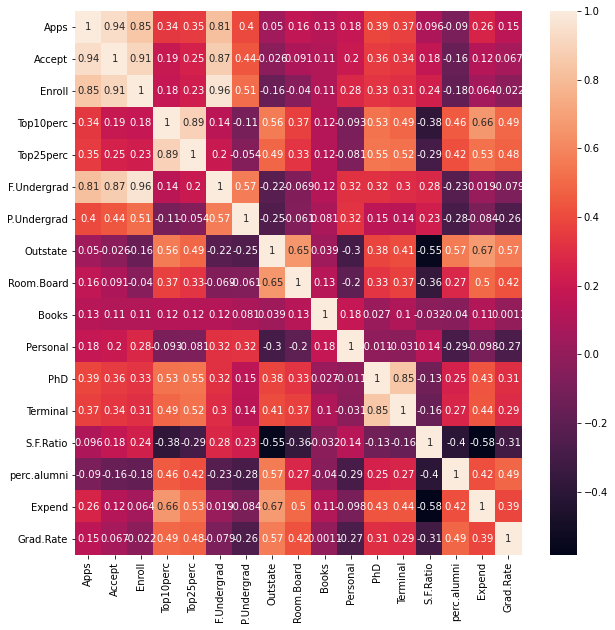

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Grad.Rate', ylabel='Density'>

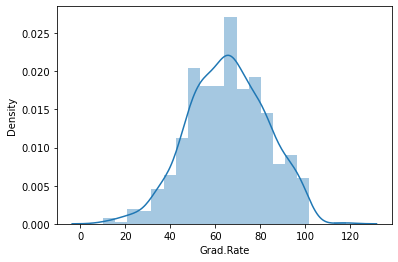

In [8]:
sns.distplot(df['Grad.Rate'])

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Grad.Rate', ylabel='Density'>

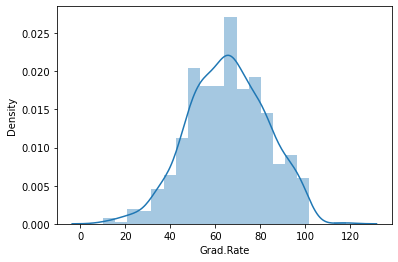

In [9]:
sns.distplot(df['Grad.Rate'])

In [10]:
df[df['Grad.Rate']>100]['Grad.Rate']=100

<ipython-input-10-8549f310e26f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Grad.Rate']>100]['Grad.Rate']=100


C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grad.Rate', ylabel='Room.Board'>

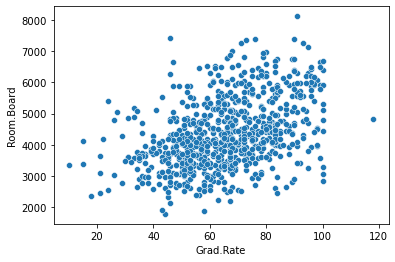

In [11]:
sns.scatterplot(df['Grad.Rate'],df['Room.Board'])

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grad.Rate', ylabel='Expend'>

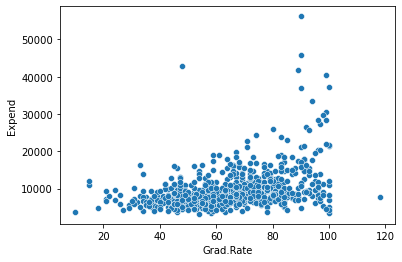

In [12]:
sns.scatterplot(df['Grad.Rate'],df['Expend'])

In [13]:
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
df.index

Index(['Abilene Christian University', 'Adelphi University', 'Adrian College',
       'Agnes Scott College', 'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College',
       ...
       'Winthrop University', 'Wisconsin Lutheran College',
       'Wittenberg University', 'Wofford College',
       'Worcester Polytechnic Institute', 'Worcester State College',
       'Xavier University', 'Xavier University of Louisiana',
       'Yale University', 'York College of Pennsylvania'],
      dtype='object', length=777)

In [16]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
df=pd.DataFrame(scaled_df,index=df.index,columns=df.columns)

In [17]:
scaled_df

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans=KMeans(n_clusters=4)

In [20]:
kmeans.fit_predict(df)

array([2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 3,
       2, 3, 1, 2, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 3, 1, 1, 2, 2,
       1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 0, 3, 1, 1, 0, 2,
       2, 2, 1, 3, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 1, 2, 2, 1, 1, 2, 0, 0,
       1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 2, 2, 2, 0, 1, 2, 1, 3, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 0, 0, 1, 0, 3, 2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 1, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1,
       3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 3, 2, 3, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 0,
       1, 0, 3, 3, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 3, 1, 2, 2, 3, 3, 2, 1, 3, 1, 3, 2, 2, 2, 1, 0, 2,
       2, 1, 3, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2,

In [21]:
kmeans.cluster_centers_

array([[ 0.54016607,  0.14501056,  0.02579116,  1.94999651,  1.57852977,
        -0.11105628, -0.41699737,  1.79044913,  1.2041349 ,  0.27215159,
        -0.48040303,  1.15257452,  1.10768901, -1.22525039,  1.32737112,
         2.10616047,  1.16226876],
       [-0.31339807, -0.28160315, -0.35762428,  0.17933177,  0.27612956,
        -0.38213116, -0.2793172 ,  0.46692822,  0.39689212, -0.06212182,
        -0.2839966 ,  0.32233626,  0.35436029, -0.27767606,  0.43001288,
         0.06664934,  0.47228711],
       [-0.36782055, -0.35730769, -0.32106359, -0.64660015, -0.69769006,
        -0.28885625, -0.11323824, -0.63862966, -0.55139034, -0.10575956,
         0.11078815, -0.72214626, -0.73583115,  0.33435589, -0.49957569,
        -0.51388981, -0.55424465],
       [ 1.79256025,  1.98818502,  2.18229968,  0.16349766,  0.36721158,
         2.25309329,  1.57544218, -0.58327739, -0.20217343,  0.33591399,
         0.84202615,  0.67055751,  0.66187969,  0.64192516, -0.58711816,
        -0.10636031

In [22]:
#SSE
kmeans.inertia_

7443.450966903961

In [23]:
sse=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

In [24]:
sse

[10469.534683524138,
 8254.103725902729,
 7443.334592026693,
 6847.811600184917,
 6508.696440730118,
 6237.577220677742,
 5988.865459129511,
 5797.718883418693]

In [25]:
def plotElbowGraph(sseValues):
    plt.figure(figsize=(10,8))
    plt.plot(range(2,len(sseValues)+2),sseValues)
    plt.xticks(range(2,len(sseValues)+2))
    plt.title("Elbow Method")
    plt.xlabel("No of Clusters")
    plt.ylabel('SSE Values')
    

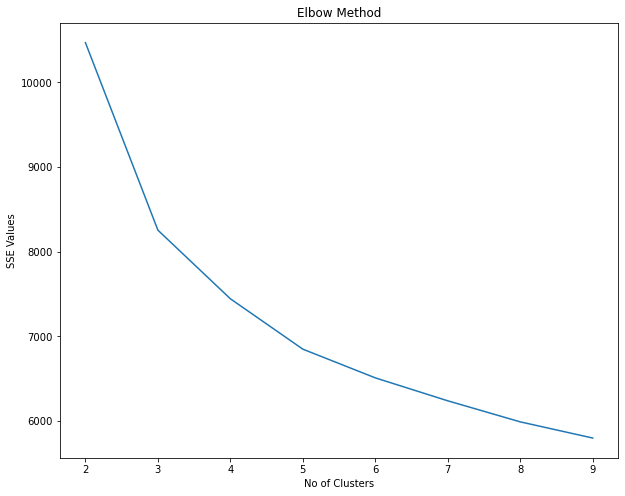

In [26]:
plotElbowGraph(sse)

Here, 4 clusters seems to be the Elbow Point

In [27]:
kmc=KMeans(n_clusters=4)

In [28]:
kmc.fit(df)

KMeans(n_clusters=4)

In [29]:
kmc.cluster_centers_

array([[-0.36782055, -0.35730769, -0.32106359, -0.64660015, -0.69769006,
        -0.28885625, -0.11323824, -0.63862966, -0.55139034, -0.10575956,
         0.11078815, -0.72214626, -0.73583115,  0.33435589, -0.49957569,
        -0.51388981, -0.55424465],
       [-0.31339807, -0.28160315, -0.35762428,  0.17933177,  0.27612956,
        -0.38213116, -0.2793172 ,  0.46692822,  0.39689212, -0.06212182,
        -0.2839966 ,  0.32233626,  0.35436029, -0.27767606,  0.43001288,
         0.06664934,  0.47228711],
       [ 0.54016607,  0.14501056,  0.02579116,  1.94999651,  1.57852977,
        -0.11105628, -0.41699737,  1.79044913,  1.2041349 ,  0.27215159,
        -0.48040303,  1.15257452,  1.10768901, -1.22525039,  1.32737112,
         2.10616047,  1.16226876],
       [ 1.79256025,  1.98818502,  2.18229968,  0.16349766,  0.36721158,
         2.25309329,  1.57544218, -0.58327739, -0.20217343,  0.33591399,
         0.84202615,  0.67055751,  0.66187969,  0.64192516, -0.58711816,
        -0.10636031

In [30]:
!pip install kmodes

In [31]:
from kmodes.kmodes import KModes

In [32]:
KModeClusters=KModes(n_clusters=2)

In [33]:
KModeClusters.fit_predict(df)

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [34]:
KModeClusters.cluster_centroids_

array([[-0.66231393, -0.63963308, -0.52227485, -0.42875686, -0.04025124,
        -0.56545052, -0.54244146, -0.96772542, -0.23497137, -0.29928017,
        -0.50343524,  0.02082214,  0.83581841, -0.70521846, -0.46382171,
        -0.91218854,  0.08951539],
       [-0.67808554, -0.68535603, -0.64935086, -0.59893091, -0.54550515,
        -0.67747169, -0.52206619, -0.96772542, -1.42111308, -0.29928017,
         0.23551492,  1.0626392 ,  0.90378606, -0.65465981,  0.26293276,
        -0.15582747, -0.14349451]])

In [35]:
sseKModes=[]
for i in range(2,10):
    KMC=KModes(n_clusters=i)
    KMC.fit_predict(df)
    sseKModes.append(KMC.cost_)

In [36]:
sseKModes

[12598.0, 12488.0, 12309.0, 12228.0, 12150.0, 12095.0, 12015.0, 11955.0]

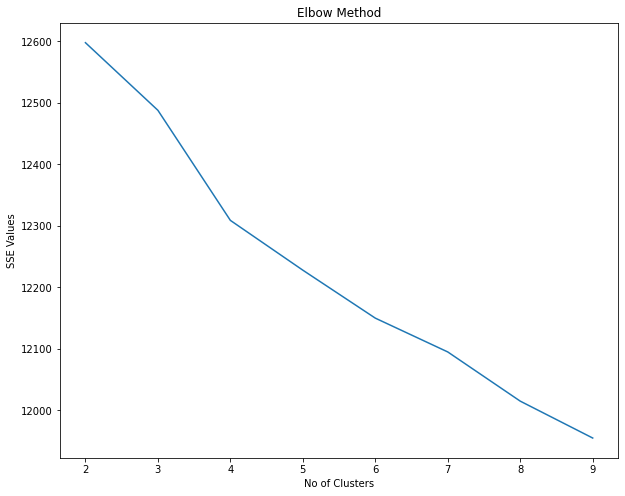

In [37]:
plotElbowGraph(sseKModes)

The same result as in the previous case, although the plot is more steep, the only visible change is at K=4

In [38]:
!pip install scikit-learn-extra

In [39]:
from sklearn_extra.cluster import KMedoids

In [40]:
KMed=KMedoids(n_clusters=4)

In [41]:
KMed.fit_predict(df)

array([1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 3, 1, 3,
       1, 3, 1, 0, 2, 3, 0, 1, 1, 2, 0, 0, 0, 1, 2, 2, 1, 3, 1, 1, 1, 0,
       1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 3, 0, 1, 3, 2, 3, 1, 3, 2, 1,
       0, 0, 1, 3, 2, 2, 2, 0, 2, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 0, 2, 2,
       1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 3, 3, 3, 0, 2, 1, 1, 1,
       1, 1, 3, 0, 2, 2, 1, 2, 3, 0, 1, 1, 2, 2, 1, 3, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 2, 2, 2, 2, 3, 3, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2,
       3, 3, 0, 0, 3, 3, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 3, 1, 1, 1, 2, 0,
       0, 0, 2, 3, 0, 3, 0, 2, 3, 3, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 3, 2,
       1, 2, 2, 3, 0, 2, 0, 1, 1, 0, 2, 0, 0, 3, 1, 0, 0, 2, 2, 1, 1, 0,
       2, 1, 1, 3, 1, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 3, 1, 2, 1, 1, 0, 1,
       0, 0, 1, 1, 2, 3, 2, 1, 0, 3, 3, 0, 3, 3, 2, 3, 0, 0, 1, 2, 2, 1,
       0, 2, 3, 0, 3, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0,

In [42]:
sseKMed=[]
for i in range(2,15):
    KM=KMedoids(n_clusters=i)
    KM.fit_predict(df)
    sseKMed.append(KM.inertia_)

In [43]:
sseKMed

[2709.120871784122,
 2658.4449598775,
 2396.7623696521387,
 2347.543897491668,
 2263.163278735459,
 2244.9479812493055,
 2207.5212560053405,
 2223.7754356798323,
 2181.4675143622535,
 2161.5709176700934,
 2138.45580338124,
 2149.355298467536,
 2105.94542554683]

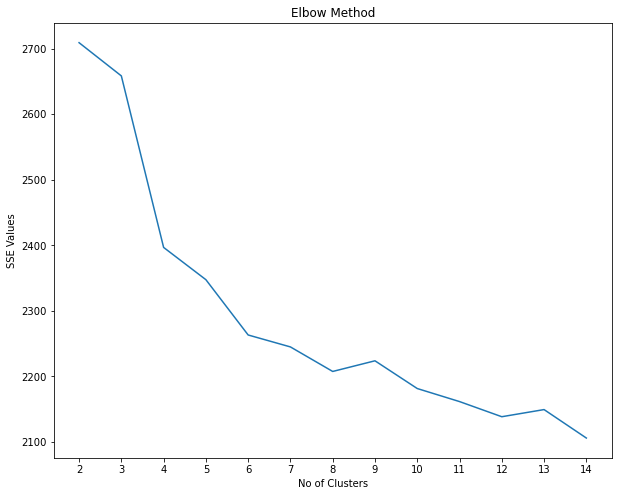

In [44]:
plotElbowGraph(sseKMed)

With KMedoids also the value seems to be 4 for which we get the Elbow point

In [45]:
def makePredictionAndAddToDF(model,df,columnName):
    model.fit(df)
    df[columnName]=model.predict(df)

In [46]:
n_clusters=5
final_KMeans=KMeans(n_clusters)
final_KModes=KModes(n_clusters)
final_KMedoids=KMedoids(n_clusters)

In [47]:
makePredictionAndAddToDF(final_KMeans,df,"KMeans_Label")
makePredictionAndAddToDF(final_KModes,df,"KModes_Label")
makePredictionAndAddToDF(final_KMedoids,df,"KMedoids_Label")

In [48]:
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,KMeans_Label,KModes_Label,KMedoids_Label
Abilene Christian University,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252,2,0,4
Adelphi University,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262,2,0,1
Adrian College,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767,2,0,1
Agnes Scott College,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504,1,0,0
Alaska Pacific University,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301,2,3,4
Xavier University,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555,0,0,3
Xavier University of Louisiana,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029,2,0,1
Yale University,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595,1,0,0
